In [1]:
%pip install pandas
%pip install matplotlib
%pip install codebleu
%pip install tree_sitter_python==0.21


[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
results = pd.read_json("/Users/harishgokul/CodeRefineAI/dataset/P2/balanced_samples_llama_codegen_submissions.json")
# Flatten the submission_details column
submission_details_df = pd.json_normalize(results['submission_details'])
results = results.drop(columns=['submission_details']).join(submission_details_df, rsuffix='_details')
results

,status,question_id,title,token,error,code,stdout,time,memory,stderr,token_details,compile_output,message,status.id,status.description
0,success,131,palindrome-partitioning,9925c6b7-83ca-4df2-8cbc-d653d115165e,None,\nimport json\nimport itertools\nimport collec...,Tests Passed!\n,0.057,6708.0,None,9925c6b7-83ca-4df2-8cbc-d653d115165e,NaN,None,3.0,Accepted
1,success,132,palindrome-partitioning-ii,c51a9247-73bc-4236-9ca3-e931ec285e1f,None,\nimport json\nimport itertools\nimport collec...,Tests Passed!\n,0.057,5260.0,None,c51a9247-73bc-4236-9ca3-e931ec285e1f,NaN,None,3.0,Accepted
2,success,135,candy,0ce43427-936d-4fce-921f-cfb3ee1bac6b,None,\nimport json\nimport itertools\nimport collec...,Tests Passed!\n,0.068,5124.0,None,0ce43427-936d-4fce-921f-cfb3ee1bac6b,NaN,None,3.0,Accepted
3,success,137,single-number-ii,619308c0-da4f-4335-9c9a-191d0efcd2e6,None,\nimport json\nimport itertools\nimport collec...,"Input {'nums': [2, 2, 2, 3, 4, 4, 4, 5, 5, 5]}...",0.064,4712.0,None,619308c0-da4f-4335-9c9a-191d0efcd2e6,NaN,None,4.0,Wrong Answer
4,success,138,copy-list-with-random-pointer,16f98b70-a5c1-4b17-901a-b4c31966683e,None,\nimport json\nimport itertools\nimport collec...,Tests Passed!\n,0.06,5404.0,None,16f98b70-a5c1-4b17-901a-b4c31966683e,NaN,None,3.0,Accepted
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,success,854,making-a-large-island,3c22a139-9be4-48c5-90bc-6671fb939385,None,\nimport json\nimport itertools\nimport collec...,Tests Passed!\n,0.078,5076.0,None,3c22a139-9be4-48c5-90bc-6671fb939385,NaN,None,3.0,Accepted
168,success,855,count-unique-characters-of-all-substrings-of-a...,594283f3-97c0-4487-a117-e63003a46ac3,None,\nimport json\nimport itertools\nimport collec...,Tests Passed!\n,2.196,19364.0,None,594283f3-97c0-4487-a117-e63003a46ac3,NaN,None,3.0,Accepted
169,success,856,consecutive-numbers-sum,0f2bea21-f5c9-41b0-ad5a-bf069e743b65,None,\nimport json\nimport itertools\nimport collec...,Tests Passed!\n,0.061,4840.0,None,0f2bea21-f5c9-41b0-ad5a-bf069e743b65,NaN,None,3.0,Accepted
170,failure,552,student-attendance-record-ii,None,No test case decoder found,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


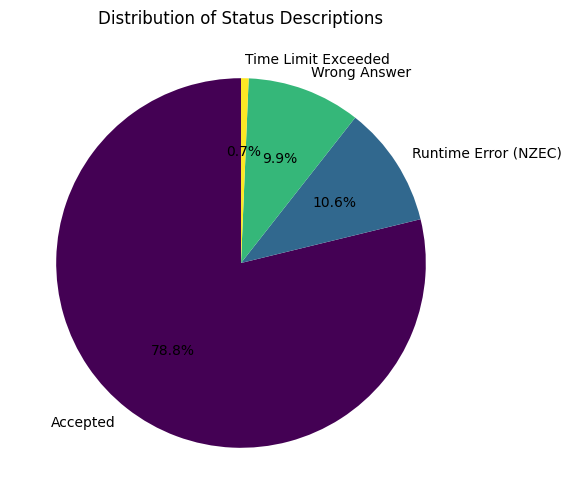

In [6]:
# Group by 'status.description' and count the occurrences
status_counts = results['status.description'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 6))
status_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Distribution of Status Descriptions')
plt.ylabel('')  # Hide the y-label
plt.show()

In [10]:
# NameError
solution_not_found = df[df['stderr'].str.contains(r"NameError", na=False)]
solution_not_found

,question_id,title,stderr


In [11]:
# ModuleNotFoundError
mod_not_found = df[df['stderr'].str.contains(r"ModuleNotFoundError", na=False)]
mod_not_found

,question_id,title,stderr
18,87,scramble-string,"Traceback (most recent call last):\n File ""script.py"", line 26, in <module>\n import numpy as np\nModuleNotFoundError: No module named 'numpy'\n"
111,391,perfect-rectangle,"Traceback (most recent call last):\n File ""script.py"", line 26, in <module>\n import numpy as np\nModuleNotFoundError: No module named 'numpy'\n"
124,363,max-sum-of-rectangle-no-larger-than-k,"Traceback (most recent call last):\n File ""script.py"", line 27, in <module>\n from sortedcontainers import SortedList\nModuleNotFoundError: No module named 'sortedcontainers'\n"
125,459,repeated-substring-pattern,"Traceback (most recent call last):\n File ""script.py"", line 47, in <module>\n import numpy as np\nModuleNotFoundError: No module named 'numpy'\n"


In [12]:
#SyntaxError
inv_syn_found = df[df['stderr'].str.contains(r"SyntaxError", na=False)]
inv_syn_found

,question_id,title,stderr


In [13]:
#TypeError
type_err_found = df[df['stderr'].str.contains(r"TypeError", na=False)]
type_err_found

,question_id,title,stderr
14,130,surrounded-regions,"Traceback (most recent call last):\n File ""script.py"", line 131, in <module>\n runner.run()\n File ""script.py"", line 115, in run\n output = self.solution.solve(**input)\nTypeError: solve() argument after ** must be a mapping, not NoneType\n"
23,148,sort-list,"Traceback (most recent call last):\n File ""script.py"", line 144, in <module>\n runner.run()\n File ""script.py"", line 128, in run\n output = self.solution.sortList(**input)\nTypeError: sortList() argument after ** must be a mapping, not NoneType\n"
26,153,find-minimum-in-rotated-sorted-array,"Traceback (most recent call last):\n File ""script.py"", line 118, in <module>\n runner.run()\n File ""script.py"", line 102, in run\n output = self.solution.findMin(**input)\nTypeError: findMin() got an unexpected keyword argument 'nums'\n"
69,109,convert-sorted-list-to-binary-search-tree,"Traceback (most recent call last):\n File ""script.py"", line 163, in <module>\n runner.run()\n File ""script.py"", line 147, in run\n output = self.solution.sortedListToBST(**input)\n File ""script.py"", line 79, in sortedListToBST\n return self.arrayToBST(nums)\n File ""script.py"", line 75, in arrayToBST\n return TreeNode(middleValue, self.arrayToBST(nums[:middleIndex]), self.arrayToBST(nums[middleIndex:]))\n File ""script.py"", line 75, in arrayToBST\n return TreeNode(middleValue, self.arrayToBST(nums[:middleIndex]), self.arrayToBST(nums[middleIndex:]))\n File ""script.py"", line 75, in arrayToBST\n return TreeNode(middleValue, self.arrayToBST(nums[:middleIndex]), self.arrayToBST(nums[middleIndex:]))\n [Previous line repeated 1 more time]\nTypeError: __init__() takes 2 positional arguments but 4 were given\n"
86,21,merge-two-sorted-lists,"Traceback (most recent call last):\n File ""script.py"", line 139, in <module>\n runner.run()\n File ""script.py"", line 123, in run\n output = self.solution.mergeTwoLists(**input)\n File ""script.py"", line 56, in mergeTwoLists\n cur = ListNode()\nTypeError: __init__() missing 1 required positional argument: 'x'\n"
123,404,sum-of-left-leaves,"Traceback (most recent call last):\n File ""script.py"", line 133, in <module>\n runner.run()\n File ""script.py"", line 114, in run\n input = self.test.decode_input(test_case['input'])\n File ""script.py"", line 100, in decode_input\n root = deserialize_tree(elements)\n File ""script.py"", line 95, in deserialize_tree\n node = TreeNode(val=int(val))\nTypeError: __init__() got an unexpected keyword argument 'val'\n"
163,750,contain-virus,"Traceback (most recent call last):\n File ""script.py"", line 147, in <module>\n runner.run()\n File ""script.py"", line 131, in run\n output = self.solution.containVirus(**input)\nTypeError: containVirus() got an unexpected keyword argument 'isInfected'\n"


In [14]:
print("Name Error: ", len(solution_not_found))
print("ModuleImportError: ", len(mod_not_found))
print("SyntaxError: ", len(inv_syn_found))
print("TypeError: ", len(type_err_found))

Name Error:  0
ModuleImportError:  4
SyntaxError:  0
TypeError:  7


{'TypeError': np.int64(7), 'ImportError': np.int64(4), 'ModuleNotFoundError': np.int64(4), 'Others': np.int64(1)}


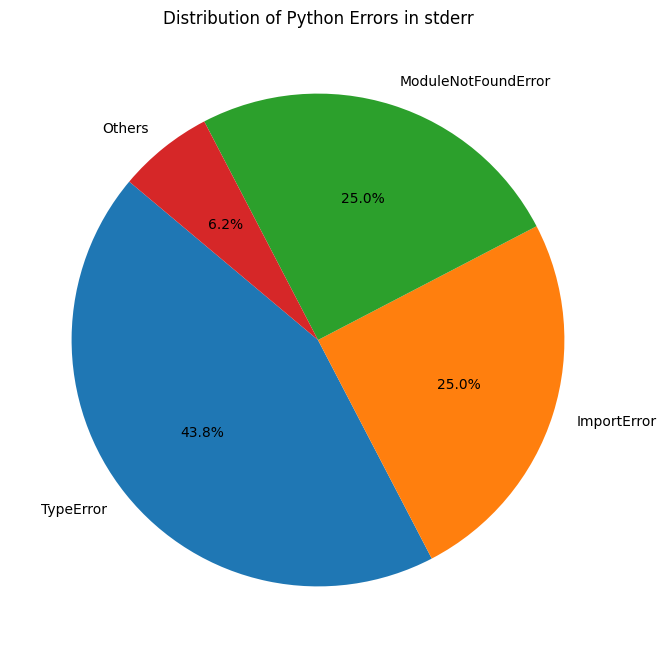

In [15]:
# Define common Python errors
python_errors = [
    "SyntaxError", "IndentationError", "TypeError", "NameError", "IndexError", "KeyError",
    "AttributeError", "ValueError", "ImportError", "ModuleNotFoundError", "ZeroDivisionError",
    "FileNotFoundError", "IOError", "EOFError", "RuntimeError", "RecursionError",
    "NotImplementedError", "AssertionError", "MemoryError", "OverflowError",
    "StopIteration", "UnboundLocalError", "PermissionError", "TimeoutError"
]

# Count occurrences of each error
error_counts = {error: df['stderr'].str.contains(rf"\b{error}\b", na=False).sum() for error in python_errors}

# Convert error counts into a DataFrame
error_df = pd.DataFrame(list(error_counts.items()), columns=["Error Type", "Count"])
error_df = error_df.sort_values(by="Count", ascending=False).reset_index(drop=True)

# Categorize errors: keep major ones, group smaller ones as "Others"
threshold = 1  # Errors with count <= threshold will be grouped as "Others"
filtered_errors = {err: count for err, count in error_counts.items() if count > threshold}
others_count = sum(count for err, count in error_counts.items() if count <= threshold)

# Add "Others" category if applicable
if others_count > 0:
    filtered_errors["Others"] = others_count

# Display DataFrame
print(filtered_errors)

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(filtered_errors.values(), labels=filtered_errors.keys(), autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Python Errors in stderr")
plt.show()


In [7]:
import pandas as pd

# File paths
codegen_file = "/Users/harishgokul/CodeRefineAI/dataset/P2/balanced_samples_llama_codegen_submissions.json"
reference_file = "/Users/harishgokul/CodeRefineAI/dataset/P2/balanced_samples_llama_reference_submissions.json"

# Load the DataFrames
codegen_df = pd.read_json(codegen_file)
submission_details_df = pd.json_normalize(codegen_df['submission_details'])
codegen_df = codegen_df.drop(columns=['submission_details']).join(submission_details_df, rsuffix='_details')

reference_df = pd.read_json(reference_file)
submission_details_df = pd.json_normalize(reference_df['submission_details'])
reference_df = reference_df.drop(columns=['submission_details']).join(submission_details_df, rsuffix='_details')


# Filter accepted solutions
codegen_accepted = codegen_df[codegen_df['status.description'] == 'Accepted']
reference_accepted = reference_df[reference_df['status.description'] == 'Accepted']

# Initialize lists to store results
faster_solutions = []
more_memory_efficient_solutions = []

# Compare performance for each question
for question_id in codegen_accepted['question_id'].unique():
    codegen_solution = codegen_accepted[codegen_accepted['question_id'] == question_id]
    reference_solution = reference_accepted[reference_accepted['question_id'] == question_id]
    
    if not codegen_solution.empty and not reference_solution.empty:
        codegen_runtime = codegen_solution['time'].values[0]
        reference_runtime = reference_solution['time'].values[0]
        codegen_memory = codegen_solution['memory'].values[0]
        reference_memory = reference_solution['memory'].values[0]
        
        # Determine which solution is faster
        if codegen_runtime < reference_runtime:
            faster_solutions.append((question_id, 'codegen', codegen_runtime, reference_runtime))
        else:
            faster_solutions.append((question_id, 'reference', codegen_runtime, reference_runtime))
        
        # Determine which solution is more memory efficient
        if codegen_memory < reference_memory:
            more_memory_efficient_solutions.append((question_id, 'codegen', codegen_memory, reference_memory))
        else:
            more_memory_efficient_solutions.append((question_id, 'reference', codegen_memory, reference_memory))

# Convert results to DataFrames
faster_solutions_df = pd.DataFrame(faster_solutions, columns=['question_id', 'faster_solution', 'codegen_runtime', 'reference_runtime'])
more_memory_efficient_solutions_df = pd.DataFrame(more_memory_efficient_solutions, columns=['question_id', 'more_memory_efficient_solution', 'codegen_memory', 'reference_memory'])

In [8]:
total = len(faster_solutions_df)
count = (faster_solutions_df["faster_solution"] == "codegen").sum()
print("LLM Actually sucks", count / total * 100)

LLM Actually sucks 53.21100917431193
